# Kaggle Simpsons Dataset Cleansing

We'll take a deep look into the [Kaggle Simpsons Dataset](https://www.kaggle.com/alexattia/the-simpsons-characters-dataset) and analize the changes that can be made to improve it.

### Requirements:
- [pip requirements](../requirements.txt)
- download the [dataset](https://www.kaggle.com/alexattia/the-simpsons-characters-dataset) (required kaggle account)

#### Imports

In [10]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Paths

In [11]:
trainset_path = '../the-simpsons-characters-dataset/simpsons_dataset/'

#### Load labels

In [19]:
labels = os.listdir(trainset_path)
labels.remove('simpsons_dataset')
len(labels)

42

#### Dataset stats

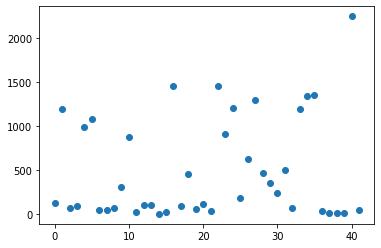

,0
count,42.000000
mean,498.404762
std,577.169420
min,3.000000
25%,49.000000
50%,154.500000
75%,967.750000
max,2246.000000


In [44]:
# get stats from current labels
count = [len(os.listdir(trainset_path + l)) for l in labels]
dfcount = pd.DataFrame(count)
stats = dfcount.describe()

plt.scatter(dfcount.index.tolist(), dfcount)
plt.show()

stats

#### Stats analisis

As we can see, we have a very high standard deviation in terms of *image count per label*, this will produce bad results with our data (i.e overfitting on a class).

In order to clean our dataset and make it more fit for our model, we need to reduce the labels that have too much images, and the ones that don't have enough.

#### Remove extra labels

First we need to look at the IQR (interquartile range): Q3 - Q1.

With this information we can detect the anomalous labels, those that have below `Q1 - 1.5 * IQR` or above `Q3 + 1.5 * IQR`.

Those that have below the lower bound, will be removed. And we will not use more images than the upper bound.

In [45]:
q1, q3 = stats[0]['25%'], stats[0]['75%']
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

lower_bound, upper_bound

(-1329.125, 2345.875)

As we can see, our lower bound is negative. In order to mantain a simpler data, we will use as bounds our quantiles directly (Q1 and Q3).

In [46]:
lower_bound = q1
upper_bound = q3

#### Remove below & above

In [48]:
ncount, nlabels = [], []
for c, l in zip(count, labels):
    if c < lower_bound:
        continue
    nlabels.append(l)
    ncount.append(upper_bound if c > upper_bound else c)

In [49]:
print(len(ncount), len(nlabels))

31 31


#### Get stats from the new labels

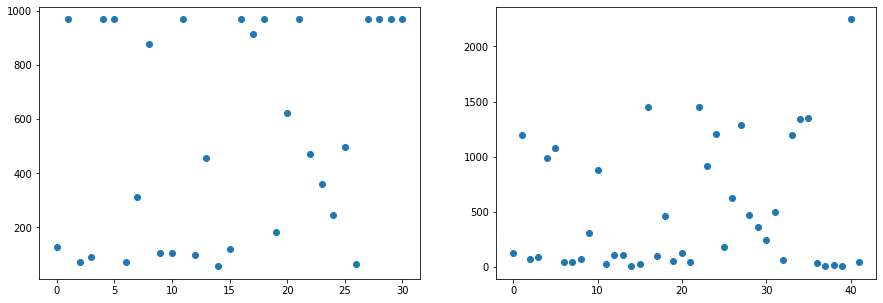

,0,0
count,42.000000,31.000000
mean,498.404762,531.782258
std,577.169420,391.936611
min,3.000000,55.000000
25%,49.000000,113.500000
50%,154.500000,469.000000
75%,967.750000,967.750000
max,2246.000000,967.750000


In [50]:
# get stats from current labels
ndfcount = pd.DataFrame(ncount)
nstats = ndfcount.describe()

f, a = plt.subplots(1, 2, figsize=(15, 5))
a[0].scatter(ndfcount.index.tolist(), ndfcount)
a[1].scatter(dfcount.index.tolist(), dfcount)
plt.show()

pd.concat([stats, nstats], axis=1)

#### Final thoughts

As a result of the **data cleaning**, we can see we have a smaller mean count, along with a smaller Standard deviation.
We've also have a larger Q1 quartile.

In the plots we can see we have less data, but the new labels have a much nicer distribution than the old ones.